In [9]:
import pandas
import numpy as numpy
import seaborn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create Data Frame

In [5]:
df = pandas.read_csv("drive/MyDrive/Colab Notebooks/vgsales.csv")
#df = df.reset_index()
df=df.dropna(axis=0, how='any')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Visualize

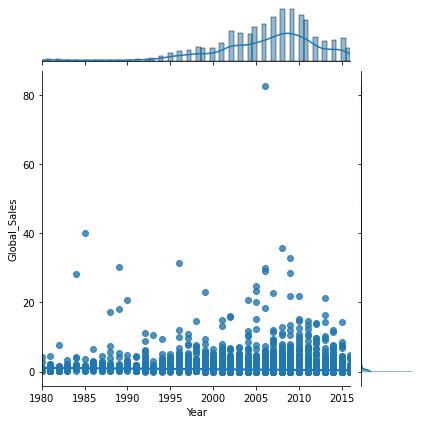

In [7]:
seaborn.jointplot(x=df["Year"], y=df["Global_Sales"], data=df, kind="reg")

#Split Data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df["Year"], df["Global_Sales"], test_size = 0.05, random_state=10)

x_train = numpy.reshape(x_train.to_numpy(), (-1,1))
x_test = numpy.reshape(x_test.to_numpy(), (-1,1))

y_train = numpy.reshape(y_train.to_numpy(), (-1,1))
y_test = numpy.reshape(y_test.to_numpy(), (-1,1))

#Linear Regression

In [11]:
#Create linear Regression model

cls = linear_model.LinearRegression()
cls.fit(x_train, y_train)

#Predict from test

prediction = cls.predict(x_test)

In [12]:
#Display all parameters

print("Co-efficient: ", end = '') 
print(cls.coef_)
print("Intercept: ", end = '')
print(cls.intercept_)
print("Mean Square Error: ", end = '')
print(metrics.mean_squared_error(y_test, prediction))
print("Model R^2: ", end = '')
print(metrics.r2_score(y_test, prediction))

Co-efficient: [[-0.02056334]]
Intercept: [41.79876233]
Mean Square Error: 2.1926875420447303
Model R^2: -0.0007120737430363899


Text(0.5, 1.0, 'Linear Regression')

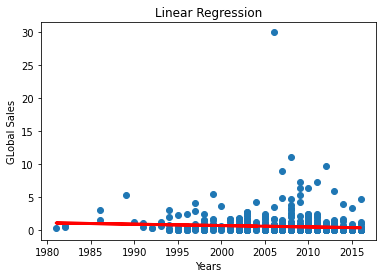

In [13]:
#Plot linear regression

plt.scatter(x_test,  y_test)
plt.plot(x_test,prediction,color='red',linewidth=3)
plt.xlabel("Years")
plt.ylabel("GLobal Sales")
plt.title("Linear Regression")